# Problema de la Mochila

A continuación se muestran los diferentes pasos de la solución al Problema de La Mochila empleando la librería [DEAP](https://github.com/DEAP/deap) de Python

## The Knapsack Problem

The following are the different steps in the solution to the Knapsack Problem using the Python [DEAP](https://github.com/DEAP/deap) library

## Descripcion del problema
Se puede encontrar una descripción completa del problema de la mochila en el siguiente [enlace](https://es.wikipedia.org/wiki/Problema_de_la_mochila).


### Description of the problem
A full description of the backpack problem can be found at the following [link](https://en.wikipedia.org/wiki/Knapsack_problem).

In [1]:
import random
import numpy as np

import matplotlib.pyplot as plt

from deap import base, creator
from deap import tools
from deap import algorithms

## Datos del problema
Por simplificación, aquí se incluyen ya los vectores que contienen los datos del problema. En muchos casos, es probable que tengamos que extraerlos de un fichero externo.


### Problem data
For simplicity, the vectors containing the problem data are already included here. In many cases, we will probably have to extract them from an external file.

In [2]:
#Trabajamos con 5 objetos
values = [10,200,50,120,200] # valor de cada objeto
weights = [45,80,25,15,75] # peso de cada objeto
knapsackMax = 200 # peso maximo que se puede cargar en la mochila

## Configuración de la Solución

### Estructuras de datos de configuración

En primer lugar, se crea el objeto donde iremos guardando las diferentes configuraciones

### Configuration data structures

First of all, the object where the different configurations will be stored is created.

In [3]:
toolbox = base.Toolbox()

### Configuración de los Individuos

Esta configuración dependerá del problema. Queda a decisión del programador la definición de cada individuo.

1. En primer lugar Se configura el fitness que se va a emplear en los individuos  
En este caso se configura para:  
    a.buscar un único objetivo: es una tupla de solo un numero  
    b.maximizar ese objetivo (se multiplica por un positivo)  
    
2. Se configura el individuo para que utilice la descripción anterior de fitness dentro de los individuos

#### Individuals configuration

This configuration will depend on the problem. It is up to the programmer to define each individual.

1. First of all, the fitness to be used for the individuals is configured.  
In this case it is configured to:  
    a.search for a single objective: it is a tuple of only one number.  
    b.maximise that objective (it is multiplied by a positive).  
    
2. The individual is configured to use the above description of fitness within each individual.

In [4]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

1. Se configura el atributo ("attribute") con el que se generará cada gen del individuo
2. El individuo se crea como una lista (o repeticion) de "attribute", definido justo antes
3. La población se crea como una lista de "individual", definido justo antes

1. The attribute with which each gene of the individual will be generated is configured.
2. The individual is created as a list (or repetition) of the "attribute", defined just before.
3. The population is created as a list of "individual", defined just before.

In [5]:
# Ejemplo de Genotipo cuyos genes son de tipo booleano '''
toolbox.register("attribute", random.randint, 0, 1)
#Tendrá una longitud de 5 atributos 
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attribute, n=5)
toolbox.register("population", tools.initRepeat, list, toolbox.individual) 

Se comprueba que está correctamente definido. 
No es necesario incluir esta celda en el experimento final.

We check that it is correctly defined. 
It is not necessary to include this cell in the final experiment.

In [6]:
# Se genera un único individuo
# A single individual is generated
ind = toolbox.individual()
print("Individuo: ",ind)
    
# Se inicializa la poblacion. Tendrá un total de 10 individuos. Se genera como una lista de individuos.
# The population is initialised. It will have a total of 10 individuals. It is generated as a list of individuals.
pop = toolbox.population(n=10)

# Se imprime la población: 10 individuos de 5 genes cada uno
# The population is printed: 10 individuals of 5 genes each
print("Poblacion: ",pop)

Individuo:  [0, 0, 0, 1, 1]
Poblacion:  [[0, 1, 1, 1, 1], [0, 1, 1, 1, 0], [1, 1, 1, 1, 1], [1, 0, 1, 1, 0], [0, 1, 0, 0, 1], [1, 1, 0, 1, 0], [1, 1, 1, 1, 1], [0, 0, 1, 0, 1], [0, 1, 0, 1, 1], [0, 1, 1, 1, 0]]


## Evaluación de la Adaptación

Para poder ejecutar el algoritmo genético, tendremos que implementar una función que, dado un individuo, nos indique (de manera numérica) cómo de adaptado está a la solución que estamos buscando.

### Fitness Assesment

In order to execute the genetic algorithm, we will have to implement a function that, given an individual, tells us (numerically) how adapted it is to the solution we are looking for.

In [7]:
def evalKnapsack(individual):

    value = 0.0
    weight = 0.0
    
    # Producto vectorial de un individuo (boolean) por los datos (float)
    # Multiplica cada bit del individuo por el valor correspondiente en el vector de datos
    # y finalmente hace la suma de todos
    value = np.dot(individual,values)
    weight = np.dot(individual,weights) # Mismo cáculo para el vector de pesos

#    print("value: ", value)
#    print("weight: ", weight)

    # Se penaliza en caso de que el peso de la mochila exceda el maximo
    diff = knapsackMax - weight
    if(diff < 0):
         value = value + (diff * 10) # OJO: tened en cuenta que diff es negativo, por lo que en realidad está RESTANDO

    return value, #OJO: La respuesta tiene que ser una tupla, aunque solo consideremos un valor

A continuación se incluye un apartado que comprueba que la función de evaluación definida es válida. Este código NO es necesario para la solución final, sino solo como demostración de la anterior.

Below is a section that checks that the defined evaluation function is valid. This code is NOT necessary for the final solution, but only as a demonstration of the previous one.

In [8]:
# Se instancia un individuo (aleatorio)
ind = toolbox.individual()
 
'''
Se aconseja al alumno probar con varios individuos en diferentes condiciones de optimalidad para comprobar si la función está bien definida en todo el espacio de búsqueda.    
'''

'''The student is advised to test with several individuals under different optimality conditions to check if the function is well defined over the whole search space.  '''

# Se imprime el individuo ANTES de evaluar
print ("\nIndividuo ANTES de evaluar")
print (ind)
print (ind.fitness.valid)  # False

ind.fitness.values = evalKnapsack(ind)

# Se imprime el individuo DESPUES de evaluar
print ("\nIndividuo TRAS evaluar")
print (ind)
print (ind.fitness.valid) # True
print (ind.fitness)


Individuo ANTES de evaluar
[0, 0, 0, 1, 0]
False

Individuo TRAS evaluar
[0, 0, 0, 1, 0]
True
(120.0,)


## Configuración del algoritmo genético

Ya hemos configurado todas las partes diréctamente relacionadas con el problema a resolver. A continuación vamos a configurar cómo queremos que la librería DEAP realice la evolución de los individuos que representan soluciones hasta encontrar la más adecuada.
Esta parte consiste en seleccionar que procedimientos queremos emplear en cada una de las partes del ciclo evolutivo.

### Setting of the genetic algorithm

We have already configured all the parts directly related to the problem to be solved. Next we are going to configure how we want the DEAP library to carry out the evolution of the individuals that represent solutions until we find the most suitable one.
This part consists of selecting which procedures we want to use in each of the parts of the evolutionary cycle.

In [9]:
# Se seleccionan procedimiento standard para cruce, mutacion y seleccion. Se recomienda repasar el material visto en teoría.
toolbox.register("select", tools.selTournament, tournsize=3) # seleccion
toolbox.register("mate", tools.cxOnePoint) # cruce
toolbox.register("mutate", tools.mutFlipBit, indpb=0.2) # mutacion

# Se define cómo se evaluará cada individuo
# En este caso, se hará uso de la función de evaluación que se ha definido en la sección anterior
toolbox.register("evaluate", evalKnapsack)

## Configuración de las estadísticas

Si deseamos obtener algún valor para ayudarnos a comprender cómo avanza el algoritmo, debemos hacerlo en el objeto del tipo Statistics. Éste calcula resúmenes sobre la función de adaptación que contienen el conjunto de los individuos de la población.

### Statistics configuration

If we wish to obtain some value to help us understand how the algorithm is progressing, we must do so in the Statistics object. This calculates summaries of the adaptation function containing the set of individuals in the population.

In [10]:
# Se configura que estadísticas se quieren analizar 
stats = tools.Statistics(lambda ind: ind.fitness.values) 
stats.register("avg", np.mean) 
stats.register("std", np.std) 
stats.register("min", np.min) 
stats.register("max", np.max) 

## Ejecución del Algoritmo

Se ejecuta el ciclo evolutivo durante el número de generaciones determindo.
Se debe tener en cuenta que, al ser un ejemplo, el problema es muy simple y no es necesario iterar durante mucho tiempo. En los casos reales, tanto el tamaño de la población, como el número de generaciones probablemente deban ser mucho mayores.

### Execution of the Algorithm

The evolutionary cycle is executed for the determined number of generations.
Note that, being an example, the problem is very simple and it is not necessary to iterate for a long time. In real cases, both the population size and the number of generations probably need to be much larger.

In [11]:
# Se genera una población inicial. El tamaño será siempre de 10 individuos.
# The population is initialised with 10 individuals.
population = toolbox.population(n=10)

# Se llama al algoritmo que permite la evolucion de las soluciones
# The algorithm that allows the evolution of the solutions is called
population, logbook = algorithms.eaSimple(population, toolbox, 
                                    cxpb=0.5, mutpb=0.2, # Probabilidades de cruce y mutacion
                                    ngen=20, verbose=False, stats=stats) # Numero de generaciones a completar y estadisticas a recoger

# Por cada generación, la estructura de logbook va almacenando un resumen de los avances del algoritmo.
# For each generation, the logbook structure stores a summary of the algorithm's progress.
print("El resultado de la evolución es: ")
print(logbook)

print("La mejor solucion encontrada es: ")
print(tools.selBest(population,1)[0])

El resultado de la evolución es: 
gen	nevals	avg	std    	min	max
0  	10    	267	128.378	10 	520
1  	4     	342	109.891	170	520
2  	3     	357	100.305	180	520
3  	8     	415	70.1783	330	520
4  	6     	453	121    	130	520
5  	6     	491	73.2735	320	570
6  	8     	530	20     	520	570
7  	3     	550	24.4949	520	570
8  	7     	565	15     	520	570
9  	7     	550	60     	370	570
10 	6     	550	60     	370	570
11 	3     	531	117    	180	570
12 	6     	518	156    	50 	570
13 	5     	550	60     	370	570
14 	3     	533	95.5039	250	570
15 	4     	553	51     	400	570
16 	5     	570	0      	570	570
17 	4     	513	171    	0  	570
18 	10    	570	0      	570	570
19 	7     	558	36     	450	570
20 	6     	457	191.523	0  	570
La mejor solucion encontrada es: 
[0, 1, 1, 1, 1]


## Representación de los resultados
Por último, se pueden obtener gráficas empleando los datos de las estadísticas recogidas, para visualizarlos de forma más intuitiva.

### Representation of the results
Finally, graphs can be obtained using the collected statistical data to visualise them in a more intuitive way.

[]

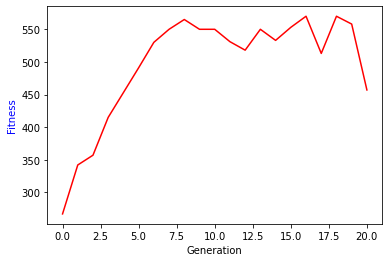

In [12]:
# Se recuperan los datos desde el log
gen = logbook.select("gen")
avgs = logbook.select("avg")
    
# Se establece una figura para dibujar
fig = plt.figure()
    
# Se representa la media del valor de fitness por cada generación
ax1 = plt.gca()
line1 = ax1.plot(gen, avgs, "r-", label="Average Fitness")    
ax1.set_xlabel("Generation")
ax1.set_ylabel("Fitness", color="b")
    
''' Notad que se deberían representar mas cosas. Por ejemplo el maximo y el minimo de
ese fitness se están recogiendo en las estadisticas, aunque en el ejemplo no se
representen '''

'''Note that additional information should be represented. For example, the maximum and minimum of that fitness are being collected in the statistics, although in the example they are not represented'''

plt.plot()